# **Mengimport File**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset**

In [23]:
data = pd.read_csv('/content/drive/MyDrive/Perkuliahan/Semester_5/Big_Data_Data_Mining/UAS/seattle-weather.csv')

print(data.head(35))

          date  precipitation  temp_max  temp_min  wind  weather
0   2012-01-01            0.0      12.8       5.0   4.7  drizzle
1   2012-01-02           10.9      10.6       2.8   4.5     rain
2   2012-01-03            0.8      11.7       7.2   2.3     rain
3   2012-01-04           20.3      12.2       5.6   4.7     rain
4   2012-01-05            1.3       8.9       2.8   6.1     rain
5   2012-01-06            2.5       4.4       2.2   2.2     rain
6   2012-01-07            0.0       7.2       2.8   2.3     rain
7   2012-01-08            0.0      10.0       2.8   2.0      sun
8   2012-01-09            4.3       9.4       5.0   3.4     rain
9   2012-01-10            1.0       6.1       0.6   3.4     rain
10  2012-01-11            0.0       6.1      -1.1   5.1      sun
11  2012-01-12            0.0       6.1      -1.7   1.9      sun
12  2012-01-13            0.0       5.0      -2.8   1.3      sun
13  2012-01-14            4.1       4.4       0.6   5.3     snow
14  2012-01-15           

# **Memeriksa nilai null**

In [24]:
print(data.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


Kita melewati kode dibawah ini karena tidak ada data yang kosong

In [ ]:
# Fill missing values with mean (if any)
data.fillna(data.mean(), inplace=True)

# **Normalisasi**

In [25]:
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'])

# Feature Engineering: Extract features from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Select relevant features for prediction
X = data[['temp_max', 'temp_min', 'precipitation', 'wind']]
y = data['temp_max']  # Predicting maximum temperature

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# **Melatih model**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, 'weather_prediction_model.pkl')

['weather_prediction_model.pkl']

# **Evaluasi**

In [29]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.0009988395904436595
R² Score: 0.9999824481535072


# **Visualisasi**

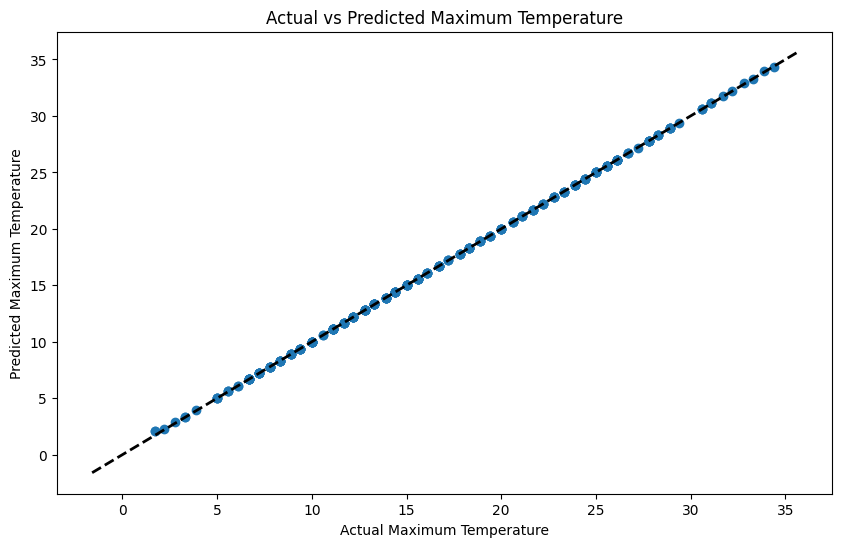

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Maximum Temperature')
plt.ylabel('Predicted Maximum Temperature')
plt.title('Actual vs Predicted Maximum Temperature')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.show()

# **Mengimport Model**

In [32]:
from google.colab import files
files.download('weather_prediction_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>